# Import modules

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset

In [47]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance.csv')
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [48]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


# Preprocessing

In [50]:
#Reducing all column names and categorical features to lowercase and removing spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df = df.rename(columns={'sleep_quality(1-10)':'sleep_quality',
                        'stress_level(1-10)':'stress_level',
                        'happiness_index(1-10)':'happiness_index'})

In [51]:
for col in ['gender', 'social_media_platform']:
    df[col] = df[col].astype('category')

In [52]:
df.isnull().sum()

user_id                      0
age                          0
gender                       0
daily_screen_time(hrs)       0
sleep_quality                0
stress_level                 0
days_without_social_media    0
exercise_frequency(week)     0
social_media_platform        0
happiness_index              0
dtype: int64

# Exploratory Data Analysis

In [53]:
for col in df.columns:
    print('Column name: ', col)
    print('Type:', df[col].dtype)
    print('Number of unique values: ',df[col].nunique())
    if df[col].dtype=='category':
        print('All unique values: ', df[col].unique())
    print('\n')

Column name:  user_id
Type: object
Number of unique values:  500


Column name:  age
Type: int64
Number of unique values:  34


Column name:  gender
Type: category
Number of unique values:  3
All unique values:  ['male', 'other', 'female']
Categories (3, object): ['female', 'male', 'other']


Column name:  daily_screen_time(hrs)
Type: float64
Number of unique values:  82


Column name:  sleep_quality
Type: float64
Number of unique values:  9


Column name:  stress_level
Type: float64
Number of unique values:  9


Column name:  days_without_social_media
Type: float64
Number of unique values:  9


Column name:  exercise_frequency(week)
Type: float64
Number of unique values:  8


Column name:  social_media_platform
Type: category
Number of unique values:  6
All unique values:  ['facebook', 'linkedin', 'youtube', 'tiktok', 'x_(twitter)', 'instagram']
Categories (6, object): ['facebook', 'instagram', 'linkedin', 'tiktok', 'x_(twitter)', 'youtube']


Column name:  happiness_index
Type: float

<Axes: xlabel='exercise_frequency(week)', ylabel='Count'>

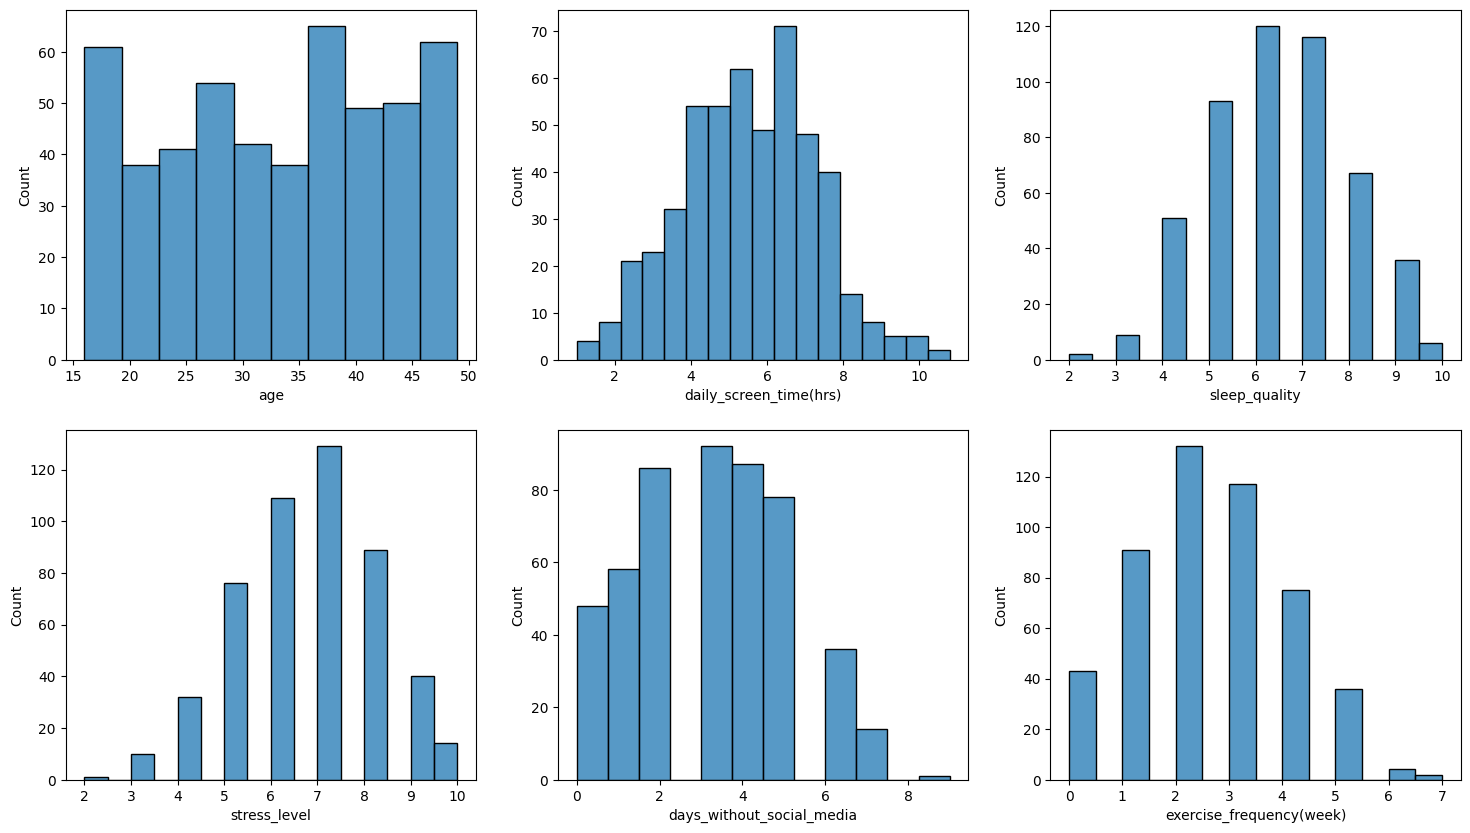

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(ax=axes[0, 0], data=df, x='age')
sns.histplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)')
sns.histplot(ax=axes[0, 2], data=df, x='sleep_quality')
sns.histplot(ax=axes[1,0], data=df, x='stress_level')
sns.histplot(ax=axes[1,1], data=df, x='days_without_social_media')
sns.histplot(ax=axes[1,2], data=df, x='exercise_frequency(week)')

<Axes: xlabel='happiness_index', ylabel='Count'>

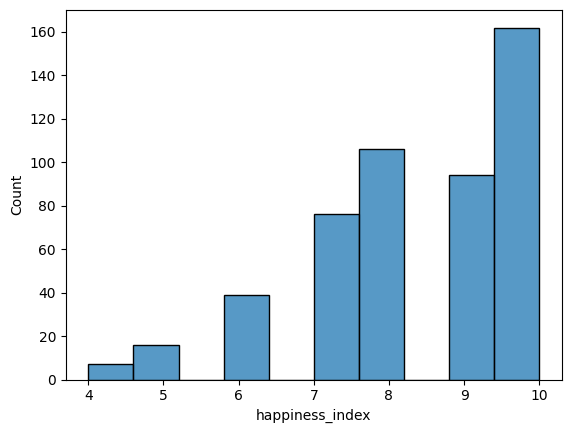

In [41]:
sns.histplot(data = df, x='happiness_index')

<Axes: xlabel='social_media_platform', ylabel='count'>

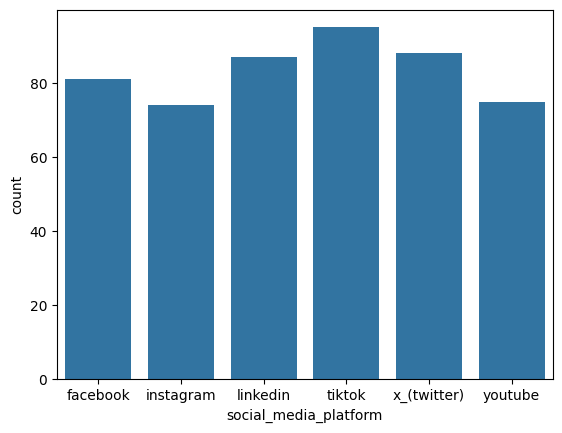

In [42]:
sns.countplot(data = df, x='social_media_platform')

<Axes: xlabel='exercise_frequency(week)', ylabel='happiness_index'>

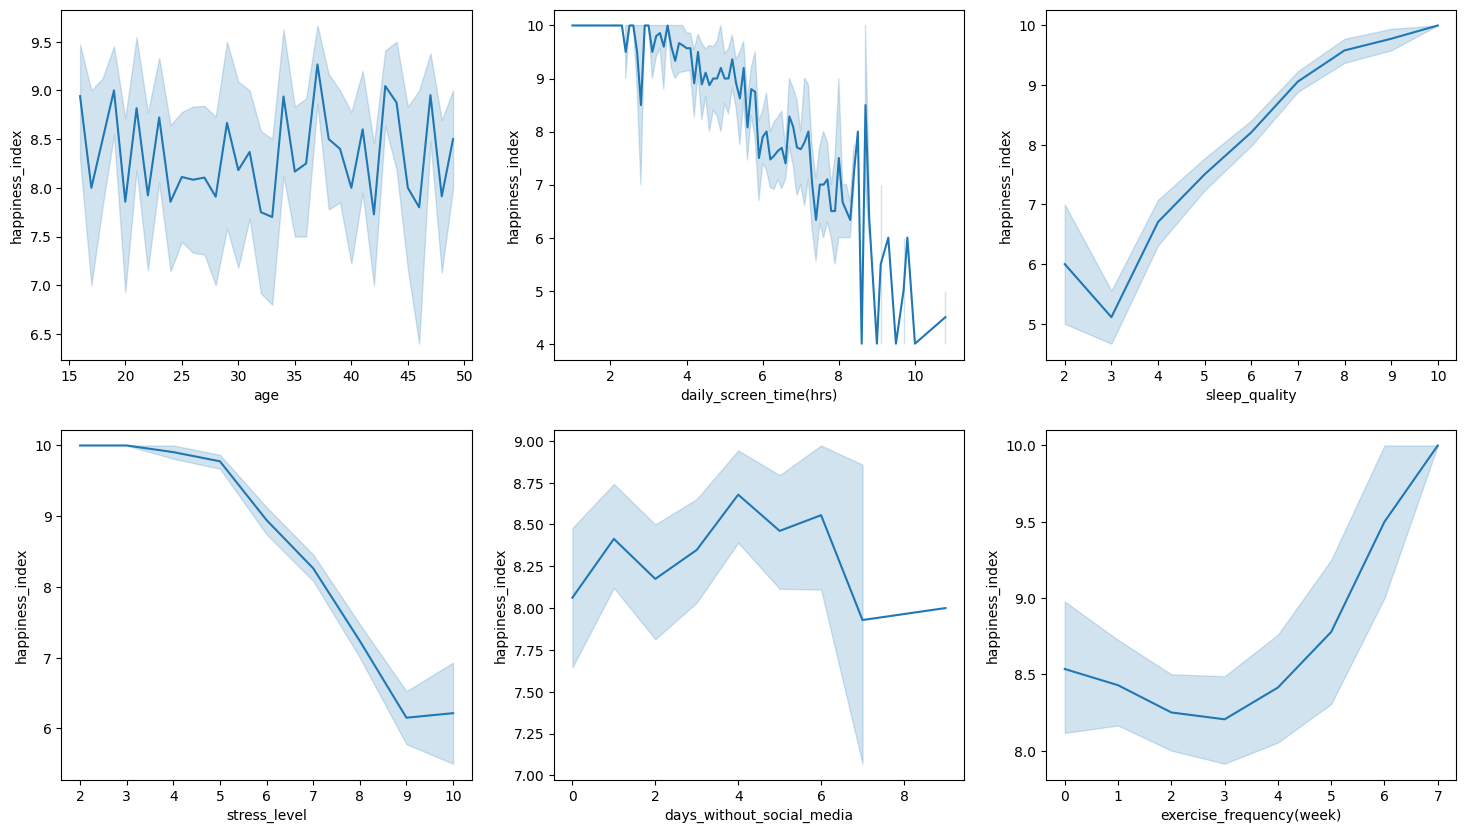

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0, 0], data=df, x='age', y='happiness_index')
sns.lineplot(ax=axes[0, 1], data=df, x='daily_screen_time(hrs)', y='happiness_index')
sns.lineplot(ax=axes[0, 2], data=df, x='sleep_quality', y='happiness_index')
sns.lineplot(ax=axes[1, 0], data=df, x='stress_level', y='happiness_index')
sns.lineplot(ax=axes[1, 1], data=df, x='days_without_social_media', y='happiness_index')
sns.lineplot(ax=axes[1, 2], data=df, x='exercise_frequency(week)', y='happiness_index')

<Axes: >

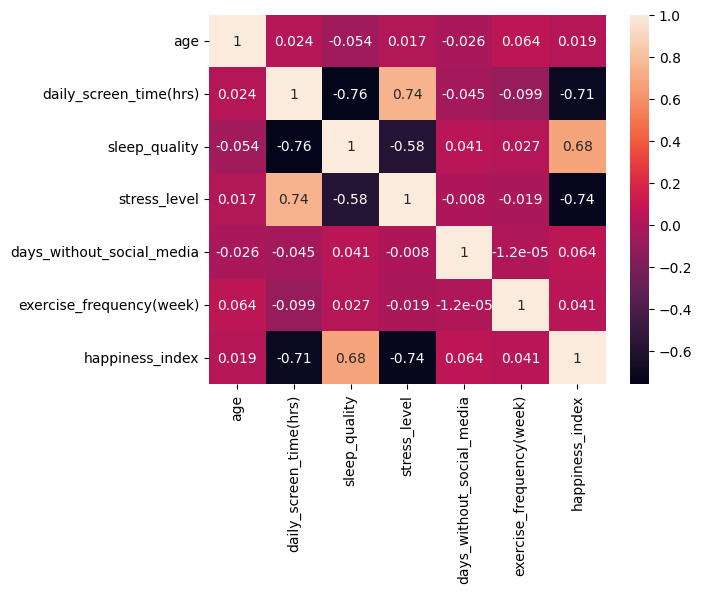

In [44]:
df_num = df.drop(['gender','user_id', 'social_media_platform'], axis=1)
corr = df_num.corr()
sns.heatmap(corr, annot=True, annot_kws={'size':10})

# Label Encoding

In [54]:
df = pd.get_dummies(df, columns = ['gender', 'social_media_platform'], dtype='int')
df.head()

,user_id,age,daily_screen_time(hrs),sleep_quality,stress_level,days_without_social_media,exercise_frequency(week),happiness_index,gender_female,gender_male,gender_other,social_media_platform_facebook,social_media_platform_instagram,social_media_platform_linkedin,social_media_platform_tiktok,social_media_platform_x_(twitter),social_media_platform_youtube
0,u001,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0
1,u002,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0
2,u003,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1
3,u004,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0
4,u005,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0


# Data split

###### Besides the 'user_id' column, we also remove the 'age' data from our model, since it has the lowest correlation to happiness index.

In [55]:
X = df.drop(['user_id', 'age','happiness_index'], axis=1)
y = df[['happiness_index']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=778, stratify=y)

# Model Training

In [56]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
cv = cross_val_score(lin_reg, X_train, y_train, cv=7, scoring='neg_root_mean_squared_error')
print('NRMSE: {}'.format(round(cv.mean(), 4)))
print('RMSE: {}'.format((round(np.sqrt(-cv.mean()), 4))))

NRMSE: -0.9342
RMSE: 0.9666


In [57]:
#Linear Regression with Ridge regularization model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid=[{'alpha': [0.01,0.05, 0.1, 0.5]}]
ridge = Ridge()
grid = GridSearchCV(ridge, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best alpha: {}'.format(grid.best_params_))

NRMSE: -0.9338
RMSE: 0.9664
Best alpha: {'alpha': 0.5}


In [58]:
#Linear Regression with Lasso regularization model
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid=[{'alpha': [0.01,0.05, 0.1, 0.5]}]
lasso = Lasso()
grid = GridSearchCV(lasso, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best alpha: {}'.format(grid.best_params_))

NRMSE: -0.9138
RMSE: 0.9559
Best alpha: {'alpha': 0.05}


In [59]:
#Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'max_depth': [5, 10, 20, 25]}]
tree = DecisionTreeRegressor()
grid = GridSearchCV(tree, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best max_depth: {}'.format(grid.best_params_))

NRMSE: -1.0919
RMSE: 1.0449
Best max_depth: {'max_depth': 5}


In [60]:
#Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'max_depth': [5, 10, 20, 25],
    'n_estimators':[5, 10, 50, 100, 150]}]
forest = RandomForestRegressor()
grid = GridSearchCV(forest, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train.values.ravel())

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best params: {}'.format(grid.best_params_))

NRMSE: -0.9303
RMSE: 0.9645
Best params: {'max_depth': 5, 'n_estimators': 150}


In [62]:
#Gradient Boosting Regressor model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid=[{'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[5, 10, 40, 50, 60, 70]}]
boost = GradientBoostingRegressor()
grid = GridSearchCV(boost, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train.values.ravel())

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best params: {}'.format(grid.best_params_))

NRMSE: -0.9121
RMSE: 0.955
Best params: {'learning_rate': 0.05, 'n_estimators': 60}


# Hyperparameter fine-tuning

In [65]:
param_grid=[{'learning_rate': [0.04, 0.05, 0.6],
    'n_estimators':[55, 60, 65]}]
boost = GradientBoostingRegressor()
grid = GridSearchCV(boost, param_grid, cv=7, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train.values.ravel())

print('NRMSE: {}'.format(round(grid.best_score_, 4)))
print('RMSE: {}'.format((round(np.sqrt(-grid.best_score_), 4))))
print('Best params: {}'.format(grid.best_params_))

best = grid.best_estimator_

NRMSE: -0.9113
RMSE: 0.9546
Best params: {'learning_rate': 0.05, 'n_estimators': 60}


In [66]:
from sklearn.metrics import root_mean_squared_error as RMSE

pred = best.predict(X_test)
rmse = RMSE(y_test, pred)
print('RMSE on the test set: {}'.format(round(rmse,4)))

RMSE on the test set: 0.8999
